In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Dimensions de X : (100, 2)
Dimensions de y : (100, 1)


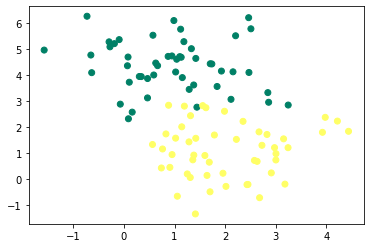

In [9]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print(f'Dimensions de X : {X.shape}')
print(f'Dimensions de y : {y.shape}')

plt.scatter(X[:,0], X[:,1], c=y, cmap='summer')

In [10]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [11]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1/(1 + np.exp(-Z))
    return A

In [12]:
def log_loss(A, y):
    return 1/len(y) * np.sum(-y*np.log(A) - (1-y)*np.log(1-A))

In [13]:
def gradients(A, X, y):
    dW = 1/len(y) * np.dot(X.T, A-y)
    db = 1/len(y) * np.sum(A-y)
    return (dW, db)

In [14]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [15]:
def artificial_neurone(X, y, learning_rate=0.1, n_iter=100):
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    plt.plot(Loss)

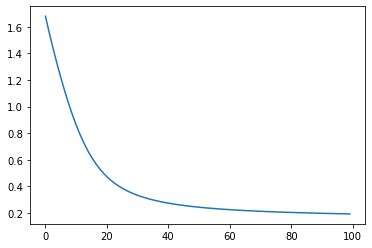

In [16]:
artificial_neurone(X, y)